In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from numpy import asarray
import matplotlib.pyplot as plt
import cv2
import glob
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Dense, Conv2D, Dropout,Flatten, MaxPooling2D
import glob
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import os,shutil
from keras import models,layers,optimizers
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.resnet50 import ResNet50

In [2]:
x_train = []
y_train =[]
x_test=[]
y_test=[]
x_predict =[]
y_predict =[]

In [3]:
def createData(files,y,x_set,y_set):
    resolution=150
    for my_file in files:
        image = Image.open(my_file).convert('RGB')
        image = np.array(image)
        if image is None or image.shape != (resolution, resolution,3):
            print(image.shape)
        else:
            x_set.append(image)
            y_set.append(y)
    print('X_data shape:', np.array(x_set).shape)

In [4]:
#Loading Trainig Data
#Buildings - 0
#Forest - 1
#Glacier - 2
#Mountain -3
#Sea - 4
#Street - 5
createData(glob.glob ("/Users/jayan/OneDrive/Desktop/Models/seg_train/seg_train/buildings/*.jpg"),0,x_train,y_train)
createData(glob.glob ("/Users/jayan/OneDrive/Desktop/Models/seg_train/seg_train/forest/*.jpg"),1,x_train,y_train)
createData(glob.glob ("/Users/jayan/OneDrive/Desktop/Models/seg_train/seg_train/glacier/*.jpg"),2,x_train,y_train)
createData(glob.glob ("/Users/jayan/OneDrive/Desktop/Models/seg_train/seg_train/mountain/*.jpg"),3,x_train,y_train)
createData(glob.glob ("/Users/jayan/OneDrive/Desktop/Models/seg_train/seg_train/sea/*.jpg"),4,x_train,y_train)
createData(glob.glob ("/Users/jayan/OneDrive/Desktop/Models/seg_train/seg_train/street/*.jpg"),5,x_train,y_train)

(124, 150, 3)
X_data shape: (2190, 150, 150, 3)
(113, 150, 3)
(108, 150, 3)
(133, 150, 3)
(115, 150, 3)
(135, 150, 3)
(136, 150, 3)
(108, 150, 3)
(113, 150, 3)
X_data shape: (4453, 150, 150, 3)
(110, 150, 3)
(105, 150, 3)
(111, 150, 3)
(120, 150, 3)
(149, 150, 3)
(143, 150, 3)
(146, 150, 3)
(134, 150, 3)
(142, 150, 3)
(123, 150, 3)
(119, 150, 3)
(102, 150, 3)
(76, 150, 3)
(97, 150, 3)
(111, 150, 3)
(111, 150, 3)
(135, 150, 3)
X_data shape: (6840, 150, 150, 3)
(134, 150, 3)
(135, 150, 3)
(123, 150, 3)
(113, 150, 3)
(142, 150, 3)
(144, 150, 3)
(103, 150, 3)
(136, 150, 3)
(144, 150, 3)
(100, 150, 3)
(143, 150, 3)
(141, 150, 3)
(146, 150, 3)
(145, 150, 3)
(81, 150, 3)
(147, 150, 3)
(131, 150, 3)
X_data shape: (9335, 150, 150, 3)
(113, 150, 3)
(113, 150, 3)
(140, 150, 3)
(113, 150, 3)
X_data shape: (11605, 150, 150, 3)
(113, 150, 3)
X_data shape: (13986, 150, 150, 3)


In [5]:
print("x_train Shape  " ,np.array(x_train).shape)
print("x_train Item Shape  ",np.array(x_train[-1]).shape)

x_train Shape   (13986, 150, 150, 3)
x_train Item Shape   (150, 150, 3)


In [6]:
#Loading Testing Data
createData(glob.glob ("/Users/jayan/OneDrive/Desktop/Models/seg_test/seg_test/buildings/*.jpg"),0,x_test,y_test)
createData(glob.glob ("/Users/jayan/OneDrive/Desktop/Models/seg_test/seg_test/forest/*.jpg"),1,x_test,y_test)
createData(glob.glob ("/Users/jayan/OneDrive/Desktop/Models/seg_test/seg_test/glacier/*.jpg"),2,x_test,y_test)
createData(glob.glob ("/Users/jayan/OneDrive/Desktop/Models/seg_test/seg_test/mountain/*.jpg"),3,x_test,y_test)
createData(glob.glob ("/Users/jayan/OneDrive/Desktop/Models/seg_test/seg_test/sea/*.jpg"),4,x_test,y_test)
createData(glob.glob ("/Users/jayan/OneDrive/Desktop/Models/seg_test/seg_test/street/*.jpg"),5,x_test,y_test)

X_data shape: (437, 150, 150, 3)
(141, 150, 3)
X_data shape: (910, 150, 150, 3)
(110, 150, 3)
(76, 150, 3)
(149, 150, 3)
(72, 150, 3)
X_data shape: (1459, 150, 150, 3)
(131, 150, 3)
(81, 150, 3)
X_data shape: (1982, 150, 150, 3)
X_data shape: (2492, 150, 150, 3)
X_data shape: (2993, 150, 150, 3)


In [7]:
#Loading Predicting data set
createData(glob.glob ("/Users/jayan/OneDrive/Desktop/Models/seg_pred/seg_pred/*.jpg"),0,x_predict,y_predict)

(133, 150, 3)
(139, 150, 3)
(108, 150, 3)
(124, 150, 3)
(131, 150, 3)
(144, 150, 3)
(149, 150, 3)
(143, 150, 3)
(129, 150, 3)
(100, 150, 3)
(112, 150, 3)
(126, 150, 3)
(374, 500, 3)
X_data shape: (7288, 150, 150, 3)


In [8]:
print(np.array(x_test).shape)
print(np.array(x_test[-1]).shape)
print(np.array(y_test).shape)

(2993, 150, 150, 3)
(150, 150, 3)
(2993,)


In [9]:
#Changing them to a numpy array
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
x_train =x_train.astype('float32')
x_test=x_test.astype('float32')
x_train /= 255
x_test/=255
x_predict = np.array(x_predict)
y_predict = np.array(y_predict)
x_predict=x_predict.astype('float32')
x_predict /= 255
print(x_predict.shape)
print(x_train.shape)
print(x_test.shape)

(7288, 150, 150, 3)
(13986, 150, 150, 3)
(2993, 150, 150, 3)


In [10]:
input_shape=(150,150,3)
res_conv = ResNet50(include_top=False,
                    weights='imagenet',
                    input_tensor=None,
                    input_shape=(150,150,3),
                    pooling=None,classes=1000)
model =Sequential()
model.add(res_conv)

model.add(Conv2D(32, 3, 3, padding='same', input_shape=input_shape, activation='relu'))
model.add(Conv2D(32, 3, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(64, 3, 3, padding='same', activation='relu'))
model.add(Conv2D(64, 3, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(128, 3, 3, padding='same', activation='relu'))
model.add(Conv2D(128, 3, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))

model.add(Conv2D(256, 3, 3, padding='same', activation='relu'))
model.add(Conv2D(256, 3, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-4), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train,batch_size=64,validation_data=(x_test, y_test), epochs=20)

model.evaluate(x_test, y_test)

# Show the model architecture
model.summary()
model.save('INTEL.h5')

predictions= model.predict(x_predict)

Epoch 1/20
219/219 [==============================] - 76s 347ms/step - loss: 1.0479 - accuracy: 0.5892 - val_accuracy: 0.1627 - val_loss: 3.2960
Epoch 2/20
219/219 [==============================] - 74s 338ms/step - loss: 0.2900 - accuracy: 0.9136 - val_accuracy: 0.2446 - val_loss: 4.9468
Epoch 3/20
219/219 [==============================] - 74s 338ms/step - loss: 0.1728 - accuracy: 0.9434 - val_accuracy: 0.6642 - val_loss: 2.1553
Epoch 4/20
219/219 [==============================] - 74s 336ms/step - loss: 0.1159 - accuracy: 0.9630 - val_accuracy: 0.7882 - val_loss: 2.3400
Epoch 5/20
219/219 [==============================] - 73s 335ms/step - loss: 0.0822 - accuracy: 0.9741 - val_accuracy: 0.9191 - val_loss: 0.6453
Epoch 6/20
219/219 [==============================] - 73s 335ms/step - loss: 0.0685 - accuracy: 0.9789 - val_accuracy: 0.8834 - val_loss: 1.7123
Epoch 7/20
219/219 [==============================] - 73s 334ms/step - loss: 0.0558 - accuracy: 0.9846 - val_accuracy: 0.9145 - va

4


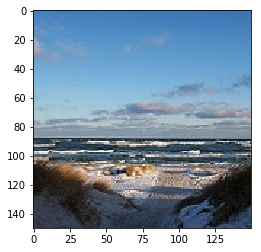

In [11]:
image_index = 1500
plt.imshow(x_predict[image_index].reshape(150, 150,3))
pred = model.predict(x_predict[image_index].reshape(1,150, 150,3))
print(pred.argmax())